# Álgebra Matricial con Python

Autor: Pedro González Rodelas

Fecha de la primera versión: 22/08/1017

Fecha de la última revisión: 25/08/2017


En esta práctica se introducen los conceptos básicos relacionados con las matrices de números reales, como son la traspuesta, inversa, etc. de una dada; los tipos fundamentales de matrices: simétricas, inversibles, ortogonales, etc.; así como las técnicas elementales del algebra matricial, como son la suma de matrices y el producto por un escalar, el producto de matrices, etc.

## Carga de los módulos y Definición de ciertas funciones empleadas

Antes de empezar a realizar cualquier cálculo numérico o simbólico debemos de cargar los correspondientes módulos de Python que implementan la mayoría de funciones y procedimientos necesarios para ello: NumPy y SymPy, que serán cargados con los pseudónimos np y sp, respectivamente. Además cargaremos la función del módulo random que nos permitirá generar números aleatorios, cada vez que los necesitemos.

In [55]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

In [5]:
from random import random 
# Importamos la función generadora de números pseudoaleatorios

También definiremos cierta función propia, `mychop`, que nos permitirá cambiar por $0$ cualquier valor que obtengamos, después de ciertos cálculos que involucren errores de redondeo, propios del cálculo con números en coma flotante. A su vez usaremos una versión vectorizada de la misma, que podremos aplicar a cualquier lista, tupla o array con valores numéricos en coma flotante.

In [2]:
def mychop(expr, *, max=10**(-15)): 
    if abs(expr) > max:
      return expr 
    else:
      return 0

In [6]:
chop_vec = np.vectorize(mychop)

## Introducción

Hay varias maneras de introducir y trabajar con *objetos* pertenecientes a *clases* concretas que nos permitirán trabajar con ellos de manera parecida a  como si fueran las *matrices* que conocemos del Álgebra Lineal. Pero habrá que tener mucho cuidado, porque no todas esas *clases de objetos* tendrán las mismas *propiedades*, ni se podrán realizar las todas las *operaciones* que conocemos, ni tampoco el *resultado* final será el esperado en algunos casos; por lo tanto, más vale realizar un repaso exhaustivo de todas estas posibilidades antes de aventurarnos a trabajar con las supuestas matrices en Python.

In [7]:
u = [1,2,3,4]; v = [5,6,7,8]   # aquí tenemos simplemente dos listas 
# de números con el mismo número de elementos cada una 

In [8]:
u[0] # podemos acceder a cada uno de los elementos de estas listas
# con su correspondiente índice (en Python el primero será siempre 0)

1

In [9]:
u[2]*v[2] # por supuesto que también podemos operar con éstos

21

In [10]:
u + v # pero fíjese qué ocurre cuando se intentan sumar

[1, 2, 3, 4, 5, 6, 7, 8]

In [1]:
# u*v # o multiplicar

Vemos pues que cualquier operación elemento a elemento, tal y cómo estamos acostumbrados a considerar, no estaría definida por defecto en Python para las listas de elementos, a no ser que las programemos nosotros expresamente.

In [12]:
[u[i]+v[i] for i in range(len(v))] #  suma elemento a elemento

[6, 8, 10, 12]

In [13]:
[u[i]*v[i] for i in range(len(v))] #  producto elemento a elemento

[5, 12, 21, 32]

In [14]:
sum([u[i]*v[i] for i in range(len(v))]) # producto escalar de u y v

70

In [15]:
A = [u,v]  # también podemos definir una lista formada por otras 
# nuevas sublistas, cada una de ellas con sus propios elementos.

In [16]:
A[0] # podemos acceder pues a cada una de estas sublistas completas

[1, 2, 3, 4]

In [17]:
A[1][0] # también podremos acceder fácilmente a cada uno de
# los elementos de estas sublistas, usando un doble índice

5

In [18]:
2*A # pero vemos que ocurre algo raro cuando intentamos operar con
# los elementos de esta estructura; por ejemplo al intentar 
# multiplicar por un valor entero lo que obtenemos es otra lista, 
# con copias de las anteriores.

[[1, 2, 3, 4], [5, 6, 7, 8], [1, 2, 3, 4], [5, 6, 7, 8]]

In [2]:
# A + 2  # incluso nos da error si intentamos sumarle cualquier número

In [20]:
A + [2]  # sin embargo lo admite cuando incluimos ese número entre []
# pero lo que realiza es una simple concatenación

[[1, 2, 3, 4], [5, 6, 7, 8], 2]

In [21]:
 A + [[9,10,11,12]] # de esta manera hemos conseguido incluso añadir
# otra sublista, con el mismo número de elementos que las anteriores

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]

In [22]:
A + [[9,10,11]] # aunque este último no es un requisito indispensable

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11]]

Llegamos pues a la conclusión de que las listas de sublistas, al contrario de lo que suele ocurrir con otros sistemas CAS como Mathematica o MATLAB por ejemplo, no es lo más adecuado en este caso para trabajar con matrices en Python y que tendremos que usar otras *clases* de *objetos* que sí nos sirvan.

No obstante, como veremos a lo largo de esta práctica, existen muchas opciones y posibilidades para trabajar eficientemente con matrices y vectores, haciendo uso de las estructuras y *clases de objetos* adecuados, incluidos en alguno de los paquetes por excelencia para el cálculo científico en Python: SymPy (cuando necesitemos trabajar de manera simbólica) y NumPy (cuando nuestros cálculos sean fundamentalmente numéricos).

## Álgebra matricial simbólica

In [54]:
from sympy import Matrix, symbols, solve, simplify, init_printing 
# empecemos con la opción simbólica e indiquemos salidas 
init_printing() #  de resultados formateadas elegantemente

In [24]:
m11, m12, m21, m22 = symbols('m11, m12, m21, m22')
b1, b2 = symbols('b1, b2')

In [25]:
# También se podrían haber generado de golpe las variables simbólicas
# de la matriz de orden 2 con la siguiente orden
symbols('m(1:3)(1:3)')

In [26]:
A = Matrix([[m11,m12],[m21,m22]])

In [96]:
b = Matrix([[b1],[b2]])

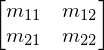

In [97]:
A

In [98]:
b

In [99]:
type(A),type(b)  # comprobemos el tipo de estos nuevos objetos

(sympy.matrices.dense.MutableDenseMatrix,
 sympy.matrices.dense.MutableDenseMatrix)

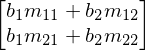

In [100]:
A*b # Vemos que ahora con las instancias de este tipo de objetos
# sí que podemos realizar las operaciones matriciales habituales
# y además de manera simbólica en este caso.

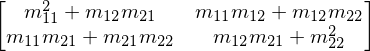

In [101]:
A**2 # aquí hemos obtenido el cuadrado de la matriz A

In [102]:
A.det() # este sería el determinante de la matriz cuadrada 2x2

In [104]:
Ainv = A.inv() # incluso la inversa de ciertas matrices también podemos 
# obtenerlo de manera simbólica (haría falta que no sea singular).

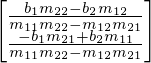

In [123]:
simplify(Ainv*b)   # He aquí pues la solución del correspondiente 
# sistema lineal Ax = b, despejando x = A^(-1)b

Hagamos ahora el intento de resolver simbólicamente cualquier sistema lineal compatible determinado de orden dos mediante la orden de resolució simbólica de ecuaciones `solve`; para ello usaremos la matriz y el vector de términos independientes ya definidos previamente y definamos también un vector de incógnitas también simbólico para poder construir el sistema final de dos ecuaciones (igualado a cero), indicando así mismo las dos incógnitas del mismo, dentro de la orden de resolución simbólica de ecuaciones `solve` (que ya hemos precargado previamente dentro del módulo SymPy).

In [54]:
?solve   # de esta manera podemos obtener información sobre la orden

In [107]:
x1, x2 = symbols('x1, x2')

In [108]:
x = Matrix([[x1], [x2]])

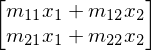

In [109]:
A*x

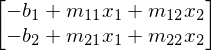

In [110]:
A*x-b

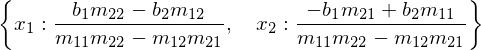

In [111]:
solve(A*x-b,[x1,x2])

Vemos claramente la solución genérica (simbólica) de un sistema 2x2 que para que sea compatible y determinado bastará con que su determinante (que justo es el valor que aparece en el denominador de las soluciones) sea distinto de cero.

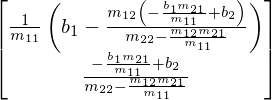

In [120]:
A.LUsolve(b)   # Esta es otra posibilidad usando LUsolve

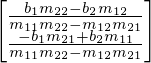

In [121]:
simplify(_)

**Ejercicio:** Intente repetir el mismo proceso para obtener de manera simbólica las soluciones genéricas de un sistema compatible y determinado 3x3.

**Ayuda:** Con el objeto de mecanizar el proceso de creación de la matriz simbólica, se puede usar la siguiente orden que permite generar de golpe todos los símbolos necesarios

    M = Matrix(3, 3, symbols('M(1:4)(1:4)'))

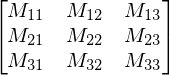

In [81]:
M = Matrix(3, 3, symbols('M(1:4)(1:4)'))
M

También es posible generar de manera sistemática matrices de cualquier orden, siempre que tengamos la ley o función generadora, dependiendo de la fila y columna que ocupe cada elemento de la misma.

Veámos como ejemplo la generación de una matriz de Toeplitz, con diagonales constantes, por ejemplo a partir de un vector de $2n-1$ datos $a_k, \; k = 1,\ldots, 2n-1$, a partir de la siguiente fórmula generadora:

$$T_{i,j} = a_{i-j+(n-1)},\; i,j = 0,\ldots, n-1 $$

In [90]:
def toeplitz(n):   # definimos una función dependiendo de 'n'
    a = symbols('a:'+str(2*n)) # generamos los símbolos necesarios
    f = lambda i,j: a[i-j+n-1] # función generadora (anónima)
    return Matrix(n,n,f)       # devuelve la matriz final

In [124]:
M = toeplitz(5) # aquí hacemos una llamada concreta a la anterior función

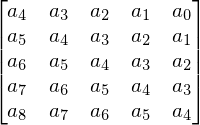

In [125]:
M

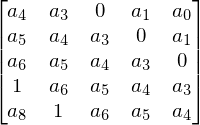

In [133]:
a2, a7 = symbols('a2, a7')  # los usaremos de nuevo como símbolos
M.subs(a2,0).subs(a7,1) # ahora podemos sustituirlos por algún valor 
# numérico por ejemplo.

## Álgebra matricial numérica

No cabe la menor duda pues de que las operaciones vectoriales y/o matriciales son indispensables en la computación científica. Por ello algunos módulos de Python utilizan diferentes estructuras y clases de objetos que implementan todas las operaciones habituales relacionadas. Entre estos módulos por excelencia que se basan en este tipo de estructuras vectoriales (también denominados arrays) cabe destacar sin duda `NumPy`.

A diferencia de las variables genéricas en Python, que son de tipado dinámico y pueden llegar a almacenar sucesivamente todo tipo de datos uno tras otro, las variables y arrays definidos en NumPy van a ser de tipo estático y homogéneo, determinado desde su inicio o definición y las operaciones posibles entre ellas estarán también predeterminadas de antemano, según el tipo de los operandos. Esto, aunque parezca que le quita cierta flexibilidad a las posibilidades de Python, hace que muchas operaciones de cómputo intensivo, tan necesarias en cálculo científico, se puedan realizar con una rapidez y eficiencia casi comparable al de los lenguajes compilados (como Fortran, C, C++ y otros), aún manteniendo la característica de lenguaje interpretado que tantas ventajas tiene de cara a interactividad y facilidad de programación.

In [160]:
import numpy as np  # para ello lo primero que debemos hacer (si no) 
# lo hubiéramos hecho ya antes, es importar dicho módulo

In [1]:
# help(np.ndarray)  # para obtener la máxima información sobre la clase
# de objetos ndarray que vamos a emplear.

In [161]:
datos = np.array([[1,2],[3,4],[5,6]])  # he aquí un primer ejemplo

In [162]:
type(datos)   # comprobemos ahora el tipo de dato de que se trata

numpy.ndarray

In [163]:
datos

array([[1, 2],
       [3, 4],
       [5, 6]])

Ahora, para extraer alguno de los elementos de estos *arrays* debemos indicar los índices de la correspondiente fila y columna mediante corchetes; mientras que si sólo indicamos un índice, éste corresponderá a toda una fila. Veámoslo:

In [164]:
datos[0], datos[0,0]

(array([1, 2]), 1)

In [165]:
datos[1]

array([3, 4])

In [166]:
datos.ndim   # para obtener el número de dimensiones del array

In [167]:
datos.shape, datos.size # para obtener sus 'forma' y 'tamaño'

Vemos que la salida de la sentencia 'shape' es una tupla, donde el primer elemento es el número de filas y el segundo el de columnas y así sucesivamente. Así pues, también podremos extraer cada uno de estos valores empleando corchetes, como sigue:

In [389]:
datos.shape[0],datos.shape[1]

In [184]:
datos.dtype, datos.nbytes # estas órdenes nos proporcionan tanto el 
# tipo de datos que contiene el array, así como el total de bytes

(dtype('int64'), 48)

In [169]:
datos[0,0] = 10  # así cambiaríamos el valor de un elemento concreto

In [172]:
datos[1] = [30,40] # y así una fila completa

In [173]:
datos # aquí vemos como ha quedado el array después de los cambios

array([[10,  2],
       [30, 40],
       [ 5,  6]])

In [174]:
datos[2,0] = 15.4 # veámos que pasa ahora al intentar darle un valor
# con decimales a una de las posiciones del array

In [175]:
datos  # vemos que se ha convertido automáticamente a tipo entero
# al ser el tipo de datos fijo del array desde su creación

array([[10,  2],
       [30, 40],
       [15,  6]])

In [176]:
datosbis = np.array([[1.,2],[3,4],[5,6]]) # véamos qué pasa ahora al 
# haber introducido un valor con el punto decimal en una posición

In [177]:
datosbis # resulta que todos los datos se han reconvertido, ya que
# todos los datos de cualquier array deben ser del mismo tipo

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.]])

In [183]:
datosbis.dtype, datosbis.nbytes # vemos que aunque ahora el tipo de 
# dato ha cambiado a float, se emplean el mismo número de bytes 

(dtype('float64'), 48)

In [185]:
datosbis.shape, datosbis.size  # coincide con el ejemplo anterior

No obstante, como veremos, también se puede especificar el tipo concreto de dato que queremos que se considere cuando se va a definir un array de NumPy. Veánse los ejemplos siguientes:

In [200]:
np.array([1,1,1], dtype = np.int16)

array([1, 1, 1], dtype=int16)

In [201]:
_.nbytes

In [196]:
np.array([1,1,1], dtype = np.float16)

array([ 1.,  1.,  1.], dtype=float16)

In [197]:
_.nbytes

In [198]:
np.array([1,1,1], dtype = np.float128)

array([ 1.0,  1.0,  1.0], dtype=float128)

In [199]:
_.nbytes

In [202]:
np.array([1,1,1], dtype = np.complex)

array([ 1.+0.j,  1.+0.j,  1.+0.j])

In [203]:
_.nbytes

In [205]:
datosbis.astype(np.int)  # aunque también es posible cambiar el tipo
# de datos de todo el array completo mediante este procedimiento

array([[1, 2],
       [3, 4],
       [5, 6]])

In [206]:
datos.astype(np.complex)

array([[ 10.+0.j,   2.+0.j],
       [ 30.+0.j,  40.+0.j],
       [ 15.+0.j,   6.+0.j]])

In [210]:
datos + datosbis # Nótese que ahora sí que podemos operar con arrays
# que posean la misma estructura (número de filas y columnas)

array([[ 11.,   4.],
       [ 33.,  44.],
       [ 20.,  12.]])

dtype('float64')

In [34]:
v1 = np.array([1,2,3], dtype = float)
v2 = np.array([4,5,6]) # podemos generar arrays de distintos tipos

In [35]:
5*v1

array([  5.,  10.,  15.])

In [36]:
v1 + v2 # y operar con ellos como si fueran vectores o matrices
# siempre y cuando tengan la misma estructura (filas y columnas)

array([ 5.,  7.,  9.])

In [37]:
_.dtype  # El resultado se ha convertido en un array de tipo float64

dtype('float64')

In [38]:
v2.dtype # aunque v2 fuera un array de números enteros

dtype('int64')

In [39]:
np.sqrt(v2) # ahora podemos aplicar también a todos los elementos 
# del array al mismo tiempo cualquier función de NumPy 

array([ 2.        ,  2.23606798,  2.44948974])

In [40]:
v2**2

array([16, 25, 36])

In [41]:
np.log(v2)

array([ 1.38629436,  1.60943791,  1.79175947])

In [42]:
np.sin(v1)

array([ 0.84147098,  0.90929743,  0.14112001])

### Generando y modificando arrays y matrices especiales

In [43]:
np.identity(3) # para generar la matriz identidad de orden n

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [44]:
np.zeros([2,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [45]:
np.ones([2,3])  # generación de un array 2x3 formado sólo con 1's

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [46]:
np.ones(6).reshape(2,3) # una forma equivalente de obtenerlo

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [47]:
np.diag(range(1,10,2))  # así generamos un array con los elementos
# indicados por la orden de Python range

array([[1, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 7, 0],
       [0, 0, 0, 0, 9]])

In [48]:
np.arange(1,10,2)  # esta orden de NumPy es una variante de range
# que genera directamente un array

array([1, 3, 5, 7, 9])

In [49]:
np.array(range(1,10,2)) # esta sería una manera equivalente

array([1, 3, 5, 7, 9])

Table[1/(i+j),{i,5},{j,0,6,2}]//MatrixForm

In [159]:
mat = np.array([[sp.Rational(1,i+j) 
                 for i in range(1,6)] for j in range(0,6,2)])
mat

array([[1, 1/2, 1/3, 1/4, 1/5],
       [1/3, 1/4, 1/5, 1/6, 1/7],
       [1/5, 1/6, 1/7, 1/8, 1/9]], dtype=object)

In [58]:
2*mat

array([[2, 1, 2/3, 1/2, 2/5],
       [2/3, 1/2, 2/5, 1/3, 2/7],
       [2/5, 1/3, 2/7, 1/4, 2/9]], dtype=object)

In [59]:
a = symbols('a')
a*mat

array([[a, a/2, a/3, a/4, a/5],
       [a/3, a/4, a/5, a/6, a/7],
       [a/5, a/6, a/7, a/8, a/9]], dtype=object)

In [334]:
?np.ndarray

In [60]:
np.linspace(0,10,11) # así generamos un array de puntos igualmente
# espaciados (partición uniforme) con los extremos indicados

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [61]:
np.logspace(0,10,11)

array([  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05,
         1.00000000e+06,   1.00000000e+07,   1.00000000e+08,
         1.00000000e+09,   1.00000000e+10])

## Operaciones vectoriales y matriciales

Todas las matrices para las que el número de filas coincide con el de columnas se denominan matrices cuadradas. Veámos a continuación algunos ejemplos y cómo podemos operar con ellas.

In [168]:
matriz1 = np.random.randn(3,3) # así generamos matrices 3x3 con 
matriz2 = np.random.randn(3,3) # elementos aleatorios obtenidos a 
# partir de una distribución normal de media 0 y varianza 1

In [169]:
matriz0 = np.zeros([3,3])
matrizI = np.identity(3)

Las llamadas matrices *escalares* se pueden construir a partir de la matriz identidad de orden n, que se obtiene con la orden  `np.identity(n)` que define una matriz de orden n  con unos en la diagonal y ceros en el resto de posiciones.

In [170]:
a*matrizI

array([[1.0*a, 0, 0],
       [0, 1.0*a, 0],
       [0, 0, 1.0*a]], dtype=object)

Como hemos visto en el último ejemplo, el producto de una matriz por un escalar se realiza de una forma inmediata, sin más que separar ambos por un `*` (como para el producto entre dos números cualesquiera). 

In [171]:
matriz1, matriz2

(array([[-1.2271086 ,  0.27111544, -0.29913254],
        [-0.67989161,  0.15945346, -0.33063799],
        [-1.33665875, -1.50466628, -0.16752379]]),
 array([[ 1.36646044,  0.71814713,  0.61599475],
        [ 0.86250925, -1.63546477, -0.4402806 ],
        [-1.28710319,  0.37965115,  1.85616901]]))

En cuanto a la suma y resta de vectores (arrays unidimensionales) matrices (arrays bidimensionales) o bien arrays multidimensionales en general, es necesario de antemano que ambos tengan los mismos órdenes/dimensiones para poder realizar dicha operación; es decir, el mismo número de filas, de columnas, etc., ya que estas operaciones entre vectores, matrices o arrays en general se realizan componente a componente. No obstante, en el caso de matrices cuadradas y del mismo orden, no habrá ningún problema tanto para la suma, ni para el producto. Veamos algunos ejemplos:

Nótese que `mat0` es el elemento neutro para  la suma de matrices. En cuanto a la matriz identidad, lo será para la multiplicación.

In [172]:
matriz0 + matriz1  # la matriz0 es el elemento neutro para la suma

array([[-1.2271086 ,  0.27111544, -0.29913254],
       [-0.67989161,  0.15945346, -0.33063799],
       [-1.33665875, -1.50466628, -0.16752379]])

In [173]:
matriz1 + matriz2

array([[ 0.13935184,  0.98926256,  0.31686221],
       [ 0.18261764, -1.47601132, -0.77091859],
       [-2.62376193, -1.12501513,  1.68864522]])

La multiplicación matricial como tal (no elemento a elemento que proporciona `*`) se obtendrá a partir de la orden `np.dot()`

In [174]:
np.dot(matrizI,matriz1) # y matrizI el elemento neutro para el producto 

array([[-1.2271086 ,  0.27111544, -0.29913254],
       [-0.67989161,  0.15945346, -0.33063799],
       [-1.33665875, -1.50466628, -0.16752379]])

In [175]:
np.dot(matriz1,matriz2)

array([[-1.05794136, -1.43821027, -1.43049986],
       [-0.36594969, -0.87456981, -1.10273392],
       [-2.90865948,  1.43731046, -0.47185187]])

In [176]:
np.linalg.matrix_power(matriz1,2) # así obtendríamos la potencia
# entera de una matriz cuadrada

array([[ 1.72130454,  0.16063685,  0.32753886],
       [ 1.16783994,  0.33859614,  0.20604606],
       [ 2.88715757, -0.35024566,  0.92540218]])

In [177]:
np.linalg.matrix_power(matriz1,-2) # aunque en algunas ocasiones
# también podremos calcular ciertas raíces de estas matrices

array([[  2.93475159,  -2.00499327,  -0.5923092 ],
       [ -3.69853852,   4.9273024 ,   0.21197686],
       [-10.55593719,   8.12025075,   3.00878258]])

In [178]:
np.linalg.matrix_power(matriz1,0) # vemos cómo al elevar a 0 una
# matriz cuadrada obtenemos la matriz identidad correspondiente

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [179]:
np.linalg.matrix_power(matriz1,-1) # y esta potencia -1 deberá ser
# equivalente a la correspondiente matriz inversa de dicha matriz

array([[-1.44636555,  1.36718104, -0.11572685],
       [ 0.90513617, -0.53600992, -0.55831134],
       [ 3.41067545, -6.09428918, -0.03128182]])

In [180]:
np.dot(np.linalg.matrix_power(matriz1,-1),matriz1) # multiplicando
# pues estas dos matrices obtenemos, salvo los inevitables errores 
# de redondeo, una matriz que se puede considerar la matriz identidad

array([[  1.00000000e+00,   2.14044751e-16,   4.91433504e-17],
       [  4.01488835e-18,   1.00000000e+00,  -1.77848840e-17],
       [  5.66931237e-17,  -4.35591089e-16,   1.00000000e+00]])

In [181]:
chop_vec(_)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Pero no toda matriz cuadrada podrá tener un elemento inverso para la multiplicación; sólo aquellas que lo posean se denominarán inversibles. Python  dispone de una orden directa para su cálculo en caso de que ésta exista. Esta sentencia es `np.linalg.inv(matriz)`.

In [182]:
matriz1inv = np.linalg.inv(matriz1) # equivaldría a la inversa de la 
# matriz (siempre y cuando ésta sea regular)
matriz1inv

array([[-1.44636555,  1.36718104, -0.11572685],
       [ 0.90513617, -0.53600992, -0.55831134],
       [ 3.41067545, -6.09428918, -0.03128182]])

Se comprueba fácilmente que este conjunto de las matrices cuadradas de orden n, junto con las operaciones de suma y producto (cada una con su correspondiente elemento neutro) tiene estructura de anillo no conmutativo (satisfaciendo pues los correspondientes axiomas y propiedades) con divisores de cero (justo esto es lo que impide que no toda matriz cuadrada tenga inversa) como veremos a continuación:

In [83]:
mat1 = np.array([[1,0],[4,0]])  # aquí tenemos dos matrices
mat2 = np.array([[0,0],[4,5]])  # cuadradas de orden 2

In [84]:
np.dot(mat1,mat2)  # cuyo producto matricial es la matriz nula

array([[0, 0],
       [0, 0]])

In [85]:
np.dot(mat2,mat1)  # pero vemos que el producto no es conmutativo

array([[ 0,  0],
       [24,  0]])

Trabajemos ahora con algunos ejemplos de matrices (arrays bidimensionales) rectangulares (no cuadradas), donde no coincida el número de filas y columnas.

In [183]:
matriz1bis = np.random.randn(2,3) # así generamos matrices 2x3 con 
matriz2bis = np.random.randn(2,3) # elementos aleatorios obtenidos a 
# partir de una distribución normal de media 0 y varianza 1
matriz1  

array([[-1.2271086 ,  0.27111544, -0.29913254],
       [-0.67989161,  0.15945346, -0.33063799],
       [-1.33665875, -1.50466628, -0.16752379]])

In [184]:
matriz2bis

array([[-1.62275267, -0.16373944, -1.4920871 ],
       [ 0.6666975 ,  0.5206618 , -0.08748341]])

In [189]:
np.linalg.matrix_rank(matriz2bis) # para saber el rango de una matriz
# osea número de filas o columnas linealmente independientes

2

In [185]:
matriz1bisT = matriz1bis.T  # así obtenemos la matriz traspuesta
matriz1bisT

array([[-0.19199588, -1.94456754],
       [ 1.39057997, -0.38376925],
       [-0.91214082, -0.67081702]])

De manera que la matriz resultante tendrá un número de filas y columnas coincidentes con el número de columnas y filas de la primera.

In [89]:
matriz1bis.shape,matriz1bisT.shape # vemos cómo se intercambian el 
# número de filas y columnas al obtener la matriz traspuesta

In [90]:
np.transpose(matriz1bis)  # otra forma de trasponer una matriz

array([[-1.65825271,  1.94792657],
       [ 0.18745247, -0.21350849],
       [-0.0645324 ,  0.10655299]])

In [91]:
np.rot90(matriz1bis) # aquí se hace algo equivalente a 'rotar' 
# los elementos de las dos primeras dimensiones de la matriz o array 

array([[-0.0645324 ,  0.10655299],
       [ 0.18745247, -0.21350849],
       [-1.65825271,  1.94792657]])

In [92]:
np.sort(matriz1bis) # ordena los elementos de cada una de las filas
# equivalente a la siguiente orden 'np.sort(matriz1,1)'

array([[-1.65825271, -0.0645324 ,  0.18745247],
       [-0.21350849,  0.10655299,  1.94792657]])

In [93]:
np.sort(matriz1bis,0) # compare con la ordenación anterior

array([[-1.65825271, -0.21350849, -0.0645324 ],
       [ 1.94792657,  0.18745247,  0.10655299]])

In [94]:
matriz1bis

array([[-1.65825271,  0.18745247, -0.0645324 ],
       [ 1.94792657, -0.21350849,  0.10655299]])

In [95]:
np.ndarray.sort(matriz1bis) # con esta orden además de realizar dicha
# ordenación por filas, finalmente se modifica la propia matriz 

In [96]:
matriz1bis # compárese con la matriz original más arriba

array([[-1.65825271, -0.0645324 ,  0.18745247],
       [-0.21350849,  0.10655299,  1.94792657]])

In [268]:
?np.fliplr

In [267]:
?np.flipud

In [362]:
np.fliplr(matriz1bis)

array([[ 1.37838747,  0.64667905,  0.30002715],
       [ 0.53221937, -0.54275283, -2.03760456]])

In [363]:
np.flipud(matriz1bis)

array([[-2.03760456, -0.54275283,  0.53221937],
       [ 0.30002715,  0.64667905,  1.37838747]])

In [97]:
v1,v2

(array([ 1.,  2.,  3.]), array([4, 5, 6]))

In [98]:
np.dot(v1,v2)   # este sería el producto escalar de vectores

In [99]:
np.inner(v1,v2) # y esta sería una manera equivalente de hacerlo

In [102]:
np.dot(matriz1bis,matriz1bisT)  # también sirve para multiplicar 
# matrices con las dimensiones adecuadas

array([[ 2.78910489,  0.71231856],
       [ 0.71231856,  3.85135732]])

In [103]:
np.dot(matriz1bis,v1)  # y por supuesto matrices y vectores

array([-1.22496012,  5.84337718])

In [104]:
np.cross(v1,v2)  # este sería el producto vectorial de vectores

array([-3.,  6., -3.])

In [105]:
np.outer(v1,v2)  # producto exterior de vectores

array([[  4.,   5.,   6.],
       [  8.,  10.,  12.],
       [ 12.,  15.,  18.]])

In [107]:
np.tensordot(matriz1bis,matriz1bisT,0) # producto tensorial 
# de matrices según la dimensión indicada

array([[[[ 2.74980204,  0.35405104],
         [ 0.10701103, -0.17669178],
         [-0.31084356, -3.2301545 ]],

        [[ 0.10701103,  0.01377822],
         [ 0.00416443, -0.00687612],
         [-0.01209676, -0.12570438]],

        [[-0.31084356, -0.04002269],
         [-0.01209676,  0.01997362],
         [ 0.03513843,  0.36514364]]],


       [[[ 0.35405104,  0.04558588],
         [ 0.01377822, -0.02274997],
         [-0.04002269, -0.41589887]],

        [[-0.17669178, -0.02274997],
         [-0.00687612,  0.01135354],
         [ 0.01997362,  0.2075574 ]],

        [[-3.2301545 , -0.41589887],
         [-0.12570438,  0.2075574 ],
         [ 0.36514364,  3.7944179 ]]]])

In [108]:
np.tensordot(matriz1bis,matriz1bisT,1) # nótese la diferencia cuando
# cambiamos el índice '0' por el '1'

array([[ 2.78910489,  0.71231856],
       [ 0.71231856,  3.85135732]])

In [109]:
np.kron(matriz1bis,matriz2bis)

array([[ 0.75475945,  0.17883763, -0.14475289,  0.02937215,  0.00695963,
        -0.00563319, -0.08531964, -0.02021619,  0.01636318],
       [-0.46492589,  0.85932406,  0.50424052, -0.01809301,  0.03344137,
         0.01962298,  0.05255623, -0.09713985, -0.05700044],
       [ 0.09717913,  0.02302626, -0.01863767, -0.04849796, -0.01149142,
         0.00930127, -0.88660551, -0.21007809,  0.17003922],
       [-0.05986158,  0.11064236,  0.06492354,  0.02987436, -0.05521688,
        -0.03240057,  0.54614202, -1.00943612, -0.59232438]])

In [294]:
?np.einsum

### Normas matriciales y vectoriales

En el siguiente link podrá consultar información relevante acerca de las posibilidades de calcular con Python tanto [normas matriciales](https://docs.scipy.org/doc/numpy-1.10.4/reference/generated/numpy.linalg.norm.html) así como el [número de condición](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.cond.html) de una matriz cuadrada inversible.

In [116]:
np.linalg.norm(matriz1),np.linalg.norm(matriz1.T)

In [117]:
np.linalg.norm(matriz1,np.inf),np.linalg.norm(matriz1,-np.inf)

In [118]:
np.linalg.norm(matriz1,'fro'),np.linalg.norm(matriz1,1)

In [119]:
np.linalg.norm(matriz1,1, axis = 0)

array([ 1.61601402,  3.38263848,  1.98865053])

In [120]:
np.linalg.norm(matriz1,1, axis = 1)

array([ 2.48463251,  1.11206919,  3.39060132])

In [121]:
matriz1[0], np.linalg.norm(matriz1[0], 1)

(array([ 0.86436975, -1.61186115, -0.00840161]), 2.4846325136338065)

In [122]:
matriz1[0], np.linalg.norm(matriz1[1], 1)

(array([ 0.86436975, -1.61186115, -0.00840161]), 1.1120691938684506)

In [123]:
np.linalg.norm(matriz1, 1, axis = (0,1))

In [124]:
np.linalg.norm(matriz1, 1, axis = (1,0))

In [156]:
np.linalg.cond(matriz1,np.inf),np.linalg.cond(matriz1inv,np.inf)
# comprobamos cómo el número de condición (en este caso con la norma
# del infinito) de una matriz coincide con el de su traspuesta

In [157]:
np.linalg.norm(matriz1,np.inf),np.linalg.norm(matriz1inv,np.inf)
# he aquí las correspondientes normas de la matriz y de su inversa

In [155]:
np.linalg.norm(matriz1,np.inf)*np.linalg.norm(matriz1inv,np.inf)
# de manera que su producto da lugar a su número de condición 

In [158]:
np.linalg.cond(matriz1,2),np.linalg.cond(matriz1,1)
# He aquí los números de condición de la misma matriz
# asociados a otras normas habituales  

In [136]:
np.linalg.cond(matriz2) # a mayor número de condición, peor 
# condicionado estará el problema de resolución de cualquier 
# sistema lineal asociado con dicha matriz

In [138]:
np.linalg.cond(matriz2,np.inf),np.linalg.cond(matriz2,1)

## Ejercicios

1.- Considere la siguiente matriz cuadrada

$$
A=\left(
\begin{array}{cccc}
 2 & 4 & 3 & 1 \\
 5 & 6 & 4 & 3 \\
 7 & 3 & 1 & 9 \\
 2 & 3 & 2 & 1 \\
\end{array}
\right).$$

Halle su traspuesta, su determinante y su rango. ¿Es invertible? En caso afirmativo, halle su inversa. Asimismo, determine las matrices $A^2$ y $A^3$. 

2.- Calcule las $p$-normas (con $p=1,2,\infty$) de la matriz anterior con las órdenes directas de Python indicadas. 

3.- Calcule también el número de condicionamiento de dicha matriz a la hora de resolver sistemas lineales. Para ello emplee la orden directa de Python indicada.